In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding and Exploration

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

In [ ]:
# Reading the dataset
dataset = pd.read_csv("boombikes.csv 1")

In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tues,1,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
dataset.shape

(730, 16)

In [ ]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Assigning string values to different seasons instead of numeric values

# 1 = Spring
dataset.loc[(dataset['season'] ==1), 'season'] = 'spring'

# 2 = Summer
dataset.loc[(dataset['season'] ==1), 'season'] = 'summer'

# 3 = fall
dataset.loc[(dataset['season'] ==1), 'season'] = 'fall'

# 4 = Winter
dataset.loc[(dataset['season'] ==1), 'season'] = 'winter'

In [ ]:
dataset['season'].astype('category').value_counts()

3         188
2         184
spring    180
4         178
Name: season, dtype: int64

In [ ]:
# 0 = 2018, 1 = 2019 : Year
dataset['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [ ]:
# Assigning string values to different months instead of numeric values
def object_map_mnths(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [ ]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)

In [ ]:
dataset['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [ ]:
dataset['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [ ]:
def str_map_weekday(x):
    return x.map({1: 'Mon',2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 7: 'Sun'})


In [ ]:
dataset[['weekday']] = dataset[['weekday']].apply(str_map_weekday)

In [ ]:
dataset['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Fri      104
Sat      104
Thurs    104
Wed      104
Name: weekday, dtype: int64

In [ ]:
dataset['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [ ]:
# 1 = Clear, Few Clouds, Partly Cloudy
dataset.loc[(dataset['weathersit'] ==1), 'weathersit'] = 'A'

# 2 = Mist, Cloudy
dataset.loc[(dataset['weathersit'] ==2), 'weathersit'] = 'B'

#3 = Light Snow, Heavy Rain
dataset.loc[(dataset['weathersit'] ==3), 'weathersit'] = 'C'

In [ ]:
dataset['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

## 2. Data Visualisation

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

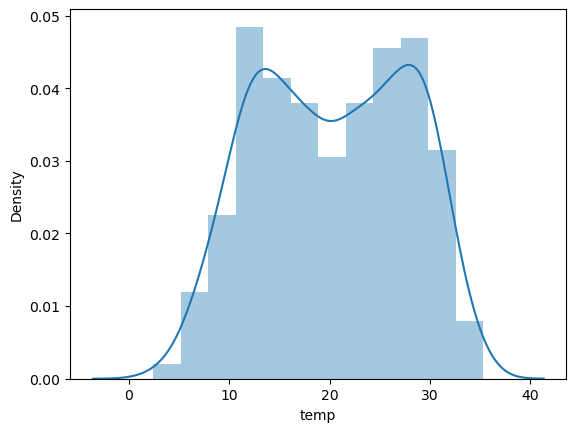

In [ ]:
# Temperature
sns.distplot(dataset['temp'])

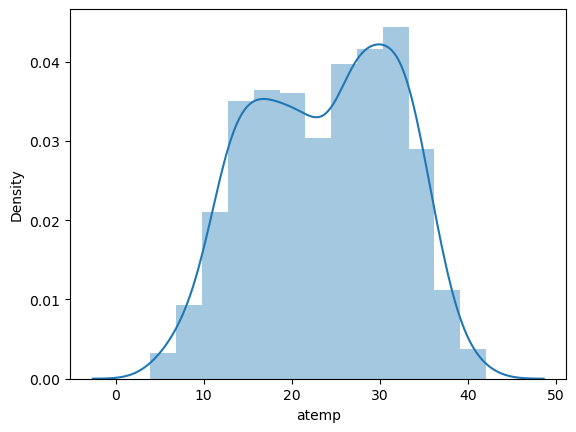

In [ ]:
# Actual Temperature
sns.distplot(dataset['atemp'])
plt.show()

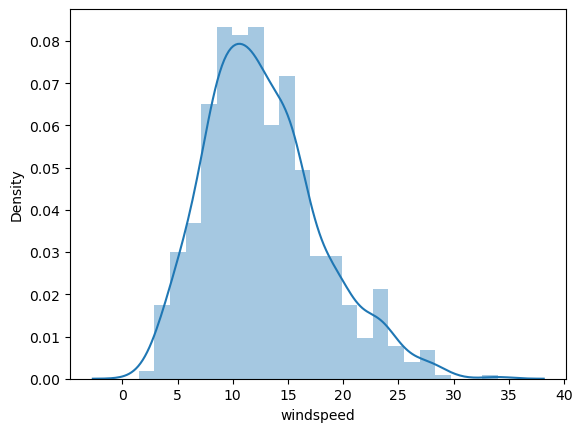

In [ ]:
# Wind Speed
sns.distplot(dataset['windspeed'])
plt.show()

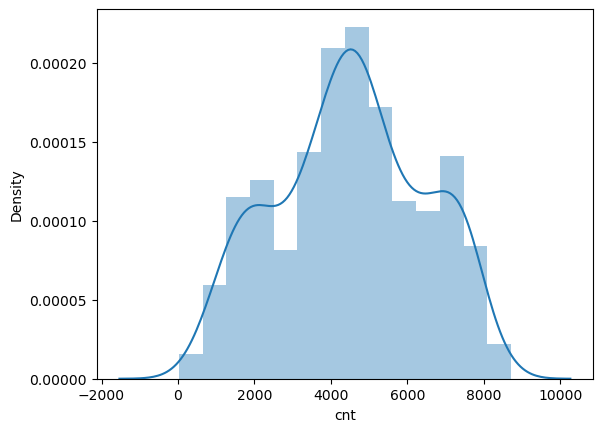

In [ ]:
# Target variable: Count of total rental bikes including both casual and registered
sns.distplot(dataset['cnt'])
plt.show()

In [ ]:
# Converting data to datetime format
dataset ['dteday'] = dataset['dteday'].astype('datetime64')

In [ ]:
dataset_categorical = dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [ ]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [ ]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Fri,B
726,spring,Dec,Sat,B
727,spring,Dec,NaN,B
728,spring,Dec,Mon,A


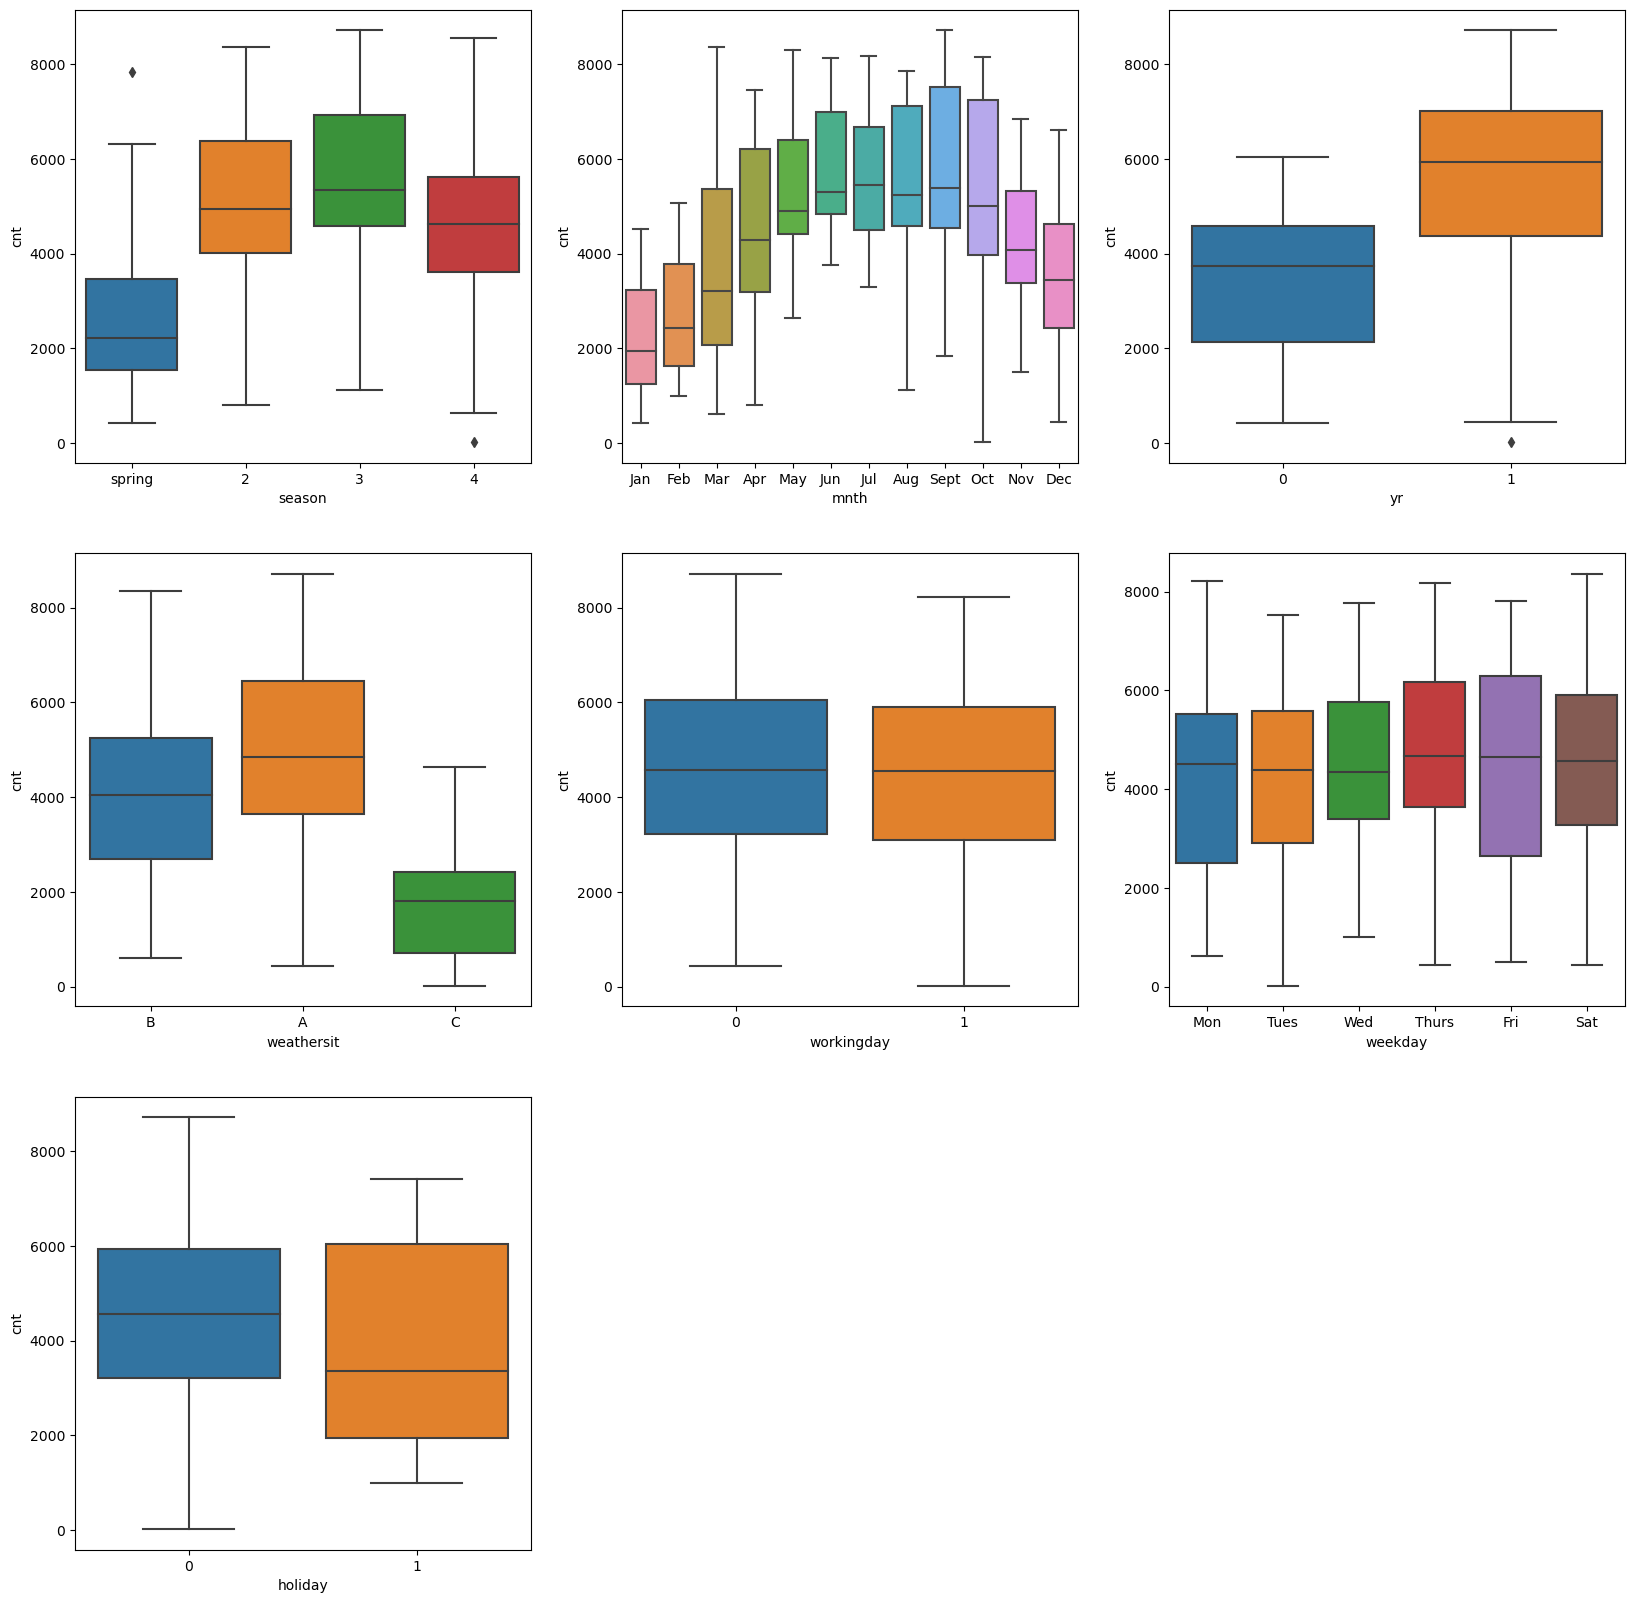

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data=dataset)
plt.show()

In [ ]:
intVarlist = ["casual", "registered", "cnt"]

for var in intVarlist:
    dataset[var] = dataset[var].astype("float")

In [ ]:
dataset_numeric = dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


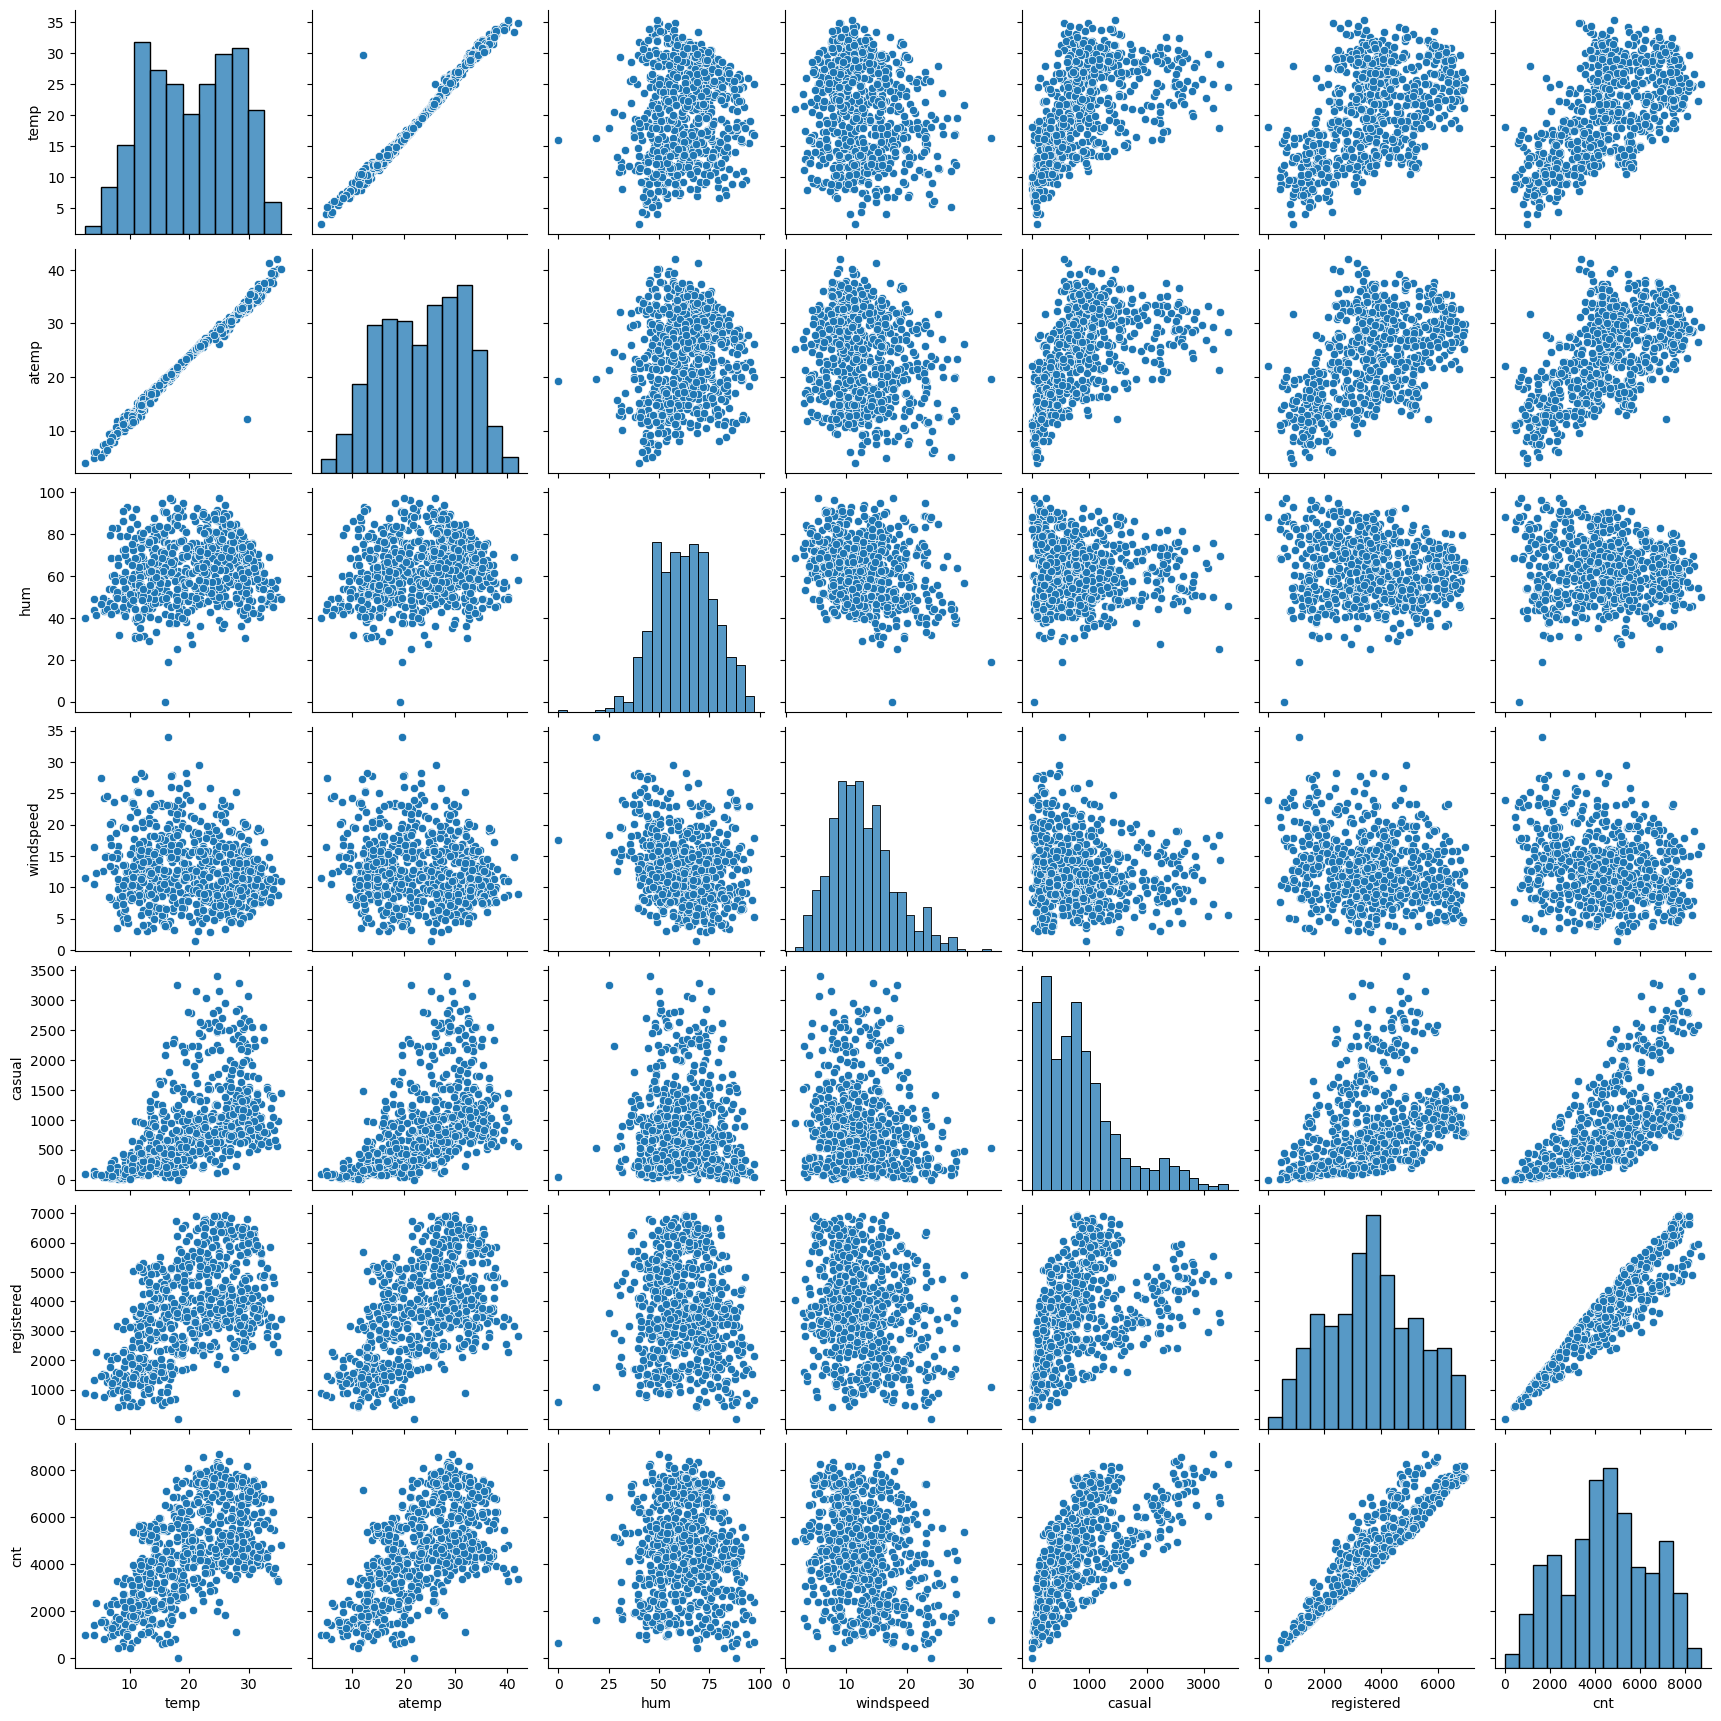

In [ ]:
sns.pairplot(dataset_numeric)
plt.show()

In [ ]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

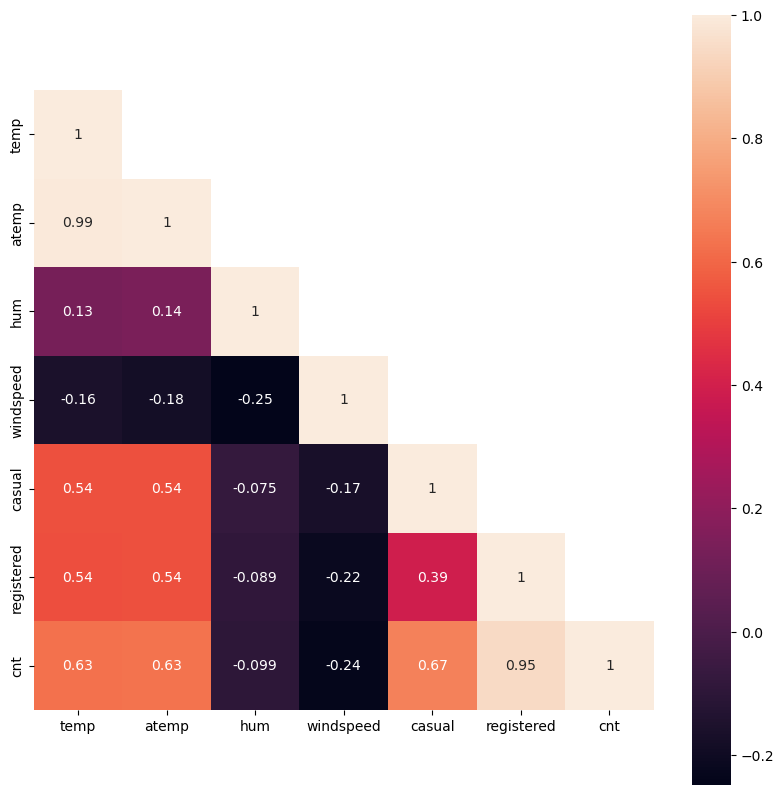

In [ ]:
# Heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(cor, mask=mask, vmax = 1, square = True, annot=True)

In [ ]:
# Removing atemp as it is highly corelated with temp
dataset.drop('atemp', axis=1, inplace=True)

In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Tues,1,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## 3. Data Preparation

In [ ]:
dataset_categorical = dataset.select_dtypes(include=['object'])

In [ ]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A


In [ ]:
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first = True)
dataset_dummies.head()

,season_3,season_4,season_spring,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop categorical variable columns
dataset = dataset.drop(list(dataset_categorical.columns), axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [ ]:
# Concatenate dummy variables with the dataset
dataset = pd.concat([dataset, dataset_dummies], axis=1)

In [ ]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset = dataset.drop(['instant','dteday'], axis=1 , inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_3,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation

In [ ]:
# Import libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Split the dataframe into train and test dataset
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state=100)

In [ ]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_3,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,1,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,1,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scalar to all column except dummy variables
var = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]

df_train[var] = scaler.fit_transform(df_train[var])

In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_3,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.262745,...,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.440557,...,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


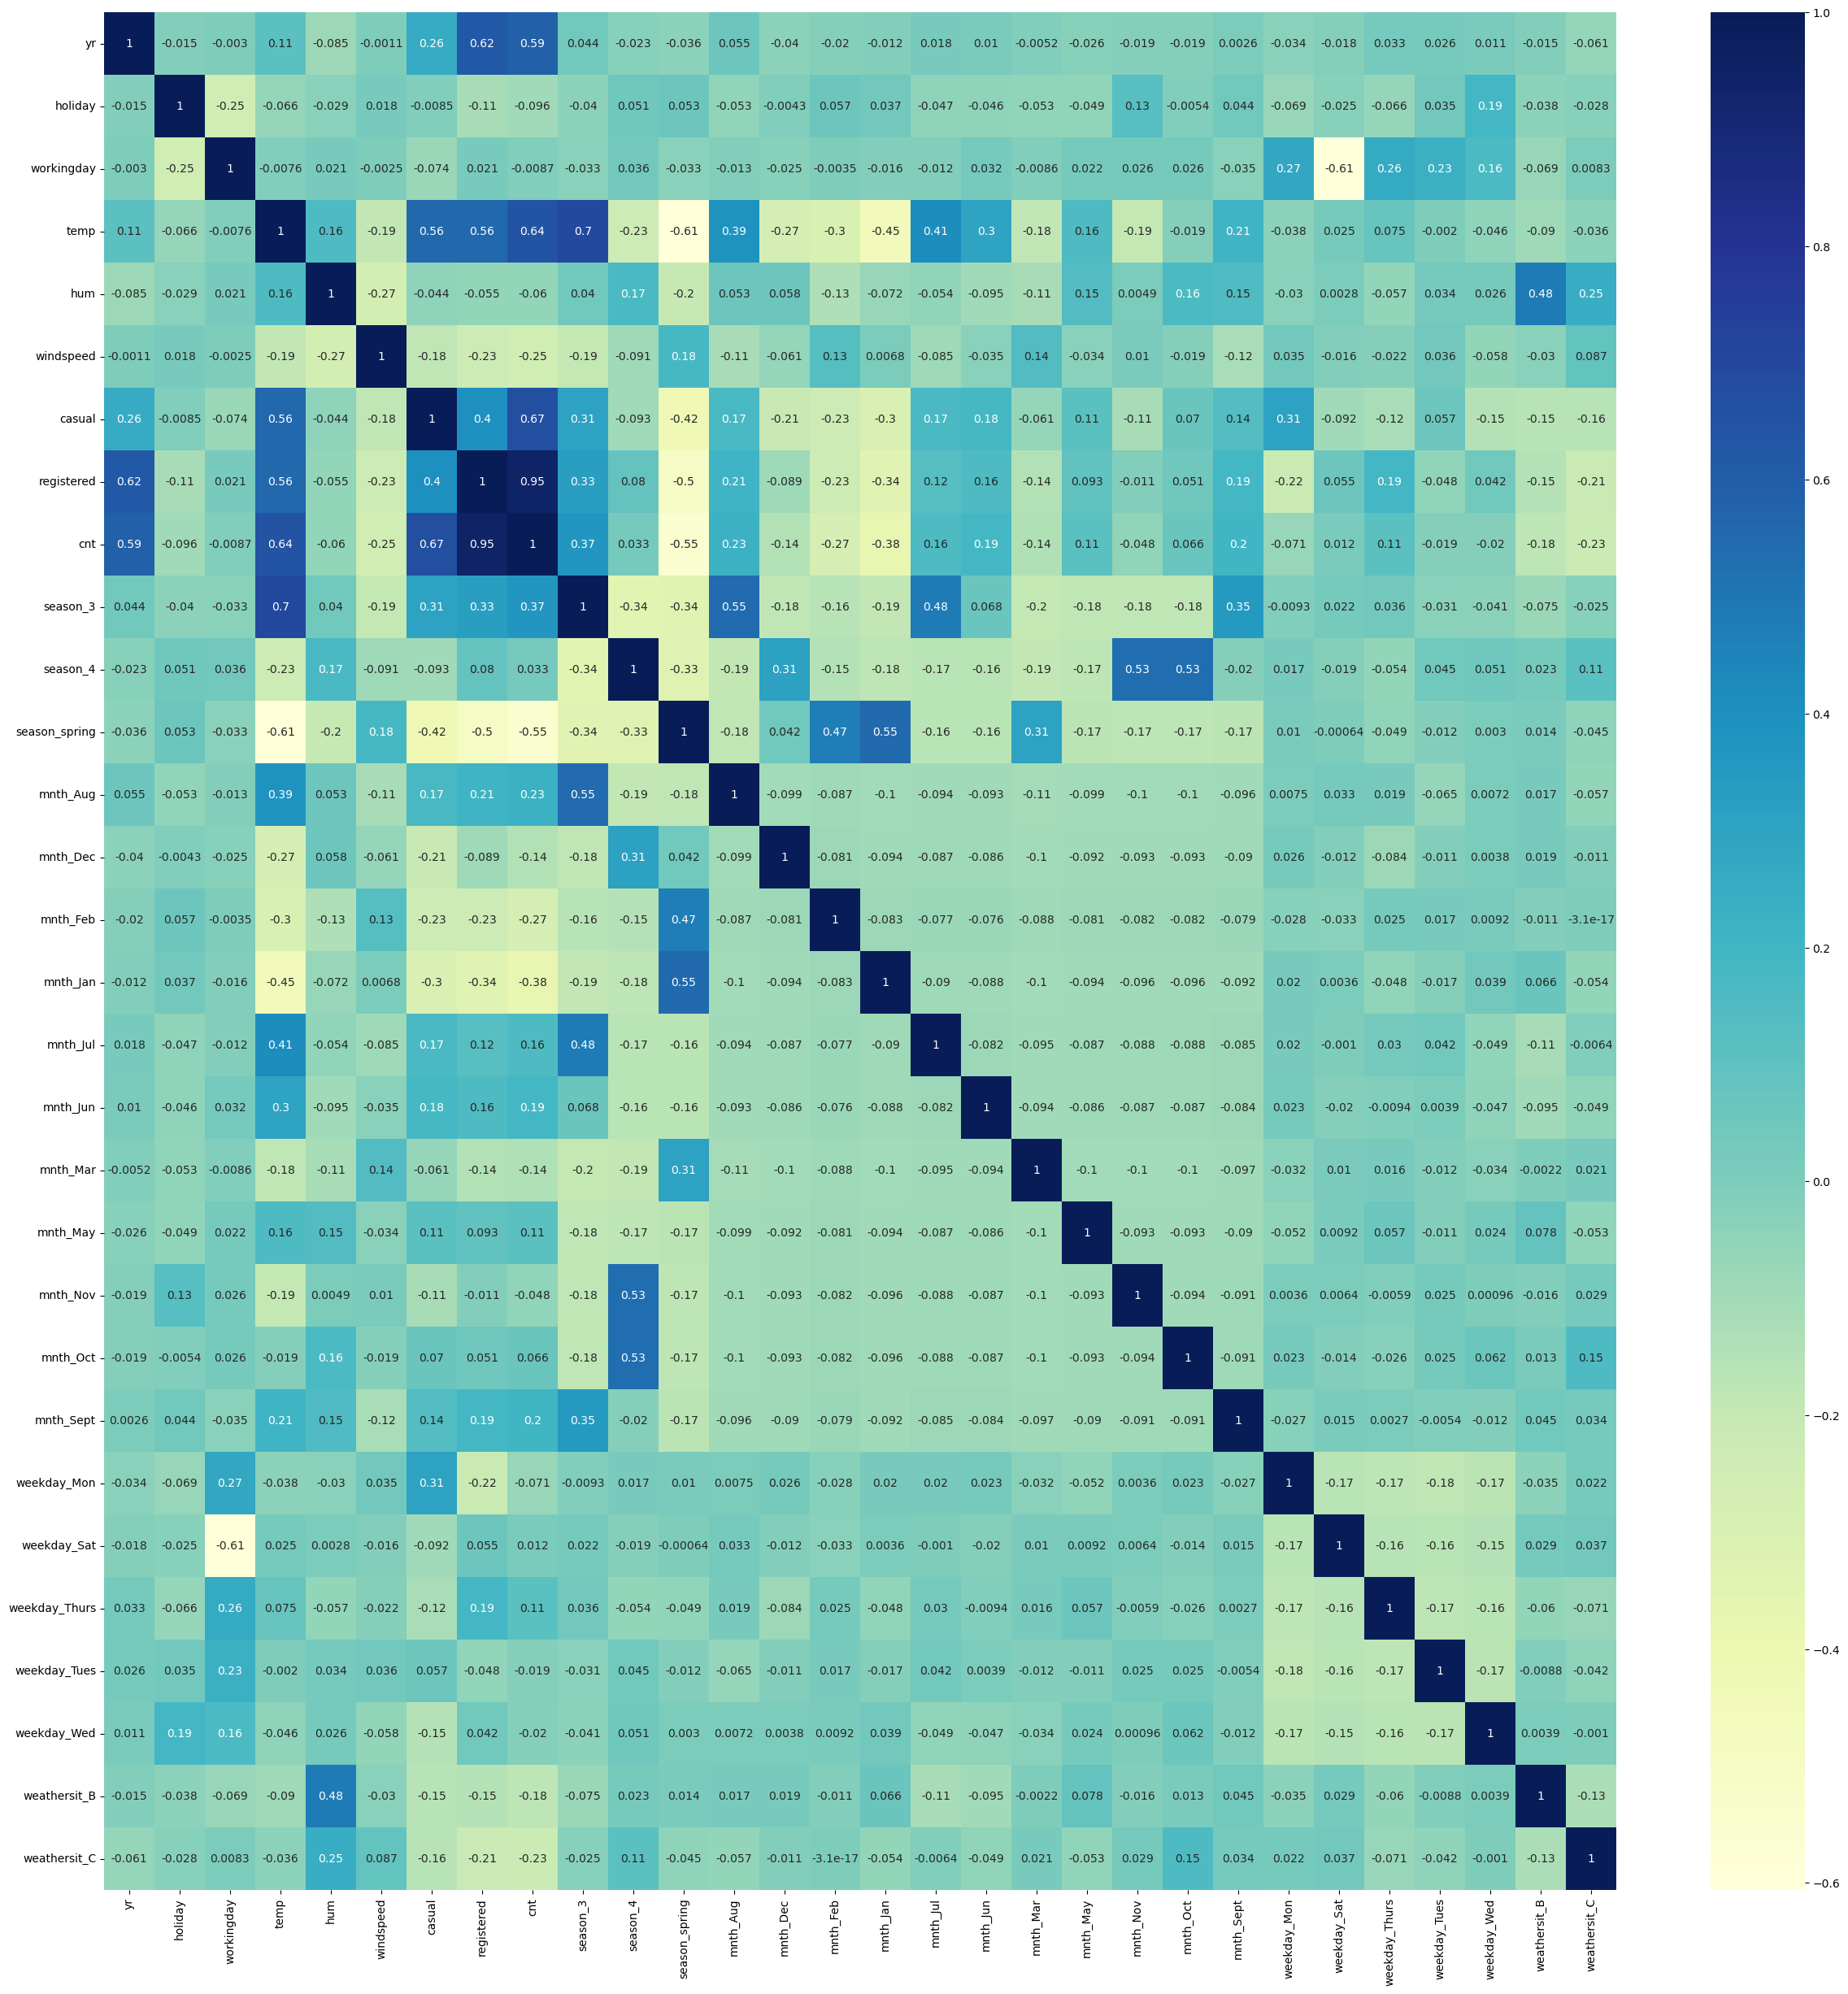

In [ ]:
# Checking the correlation coefficient to see which variables are highly corelated
plt.figure(figsize= (30,30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# Dividing into x and y
x_train = df_train.drop(["casual", "registered"], axis=1)
y_train = df_train.pop('cnt')

In [ ]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_3,season_4,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,1,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,1,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
np.array(df_train)

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [ ]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

In [ ]:
x_train_lm

,const,yr,holiday,workingday,temp,hum,windspeed,cnt,season_3,season_4,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0.864243,0,1,...,0,1,0,0,0,0,0,1,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0.764151,0,0,...,0,0,0,0,0,0,1,0,1,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0.832835,1,0,...,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,0.218017,0,0,...,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0,1,0.248216,0.577930,0.431816,0.312586,0,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[-1.37669144e-16  7.63275056e-17 -8.82460461e-17 -1.69858766e-16
  1.23337627e-17  1.53635406e-16  1.00000000e+00  3.09988810e-16
 -2.40242133e-16  4.38490198e-17 -3.62155300e-16  3.27953846e-16
  2.17661346e-16  3.41930853e-16 -3.47592164e-16 -2.88997015e-16
  2.62562856e-16 -6.33427881e-17  3.27221149e-16  1.94905462e-16
 -3.15437083e-16  1.52618824e-17  6.40774207e-17  8.04130225e-17
  1.98086646e-16  2.33676336e-17  6.30278084e-17  3.67755776e-16]
-5.551115123125783e-16


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.562e+29
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:27:32   Log-Likelihood:                 16581.
No. Observations:                 510   AIC:                        -3.310e+04
Df Residuals:                     481   BIC:                        -3.298e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.498e-16   8.38e-16      0.298      0.766    -1.4e-15     1.9e-15
yr             4.129e-16   2.82e-16      1.464      0.144   -1.41e-16    9.67e-16
holiday        3.261e-16   6.27e-16      0.520      0.603   -9.06e-16    1.56e-15
workingday     5.274e-16   3.17e-16      1.665      0.097    -9.5e-17    1.15e-15
temp          -5.135e-16   1.08e-15     -0.475      0.635   -2.64e-15    1.61e-15
hum            1.082e-15   8.37e-16      1.293      0.197   -5.63e-16    2.73e-15
windspeed     -3.261e-16   5.79e-16     -0.563      0.574   -1.46e-15    8.12e-16
cnt               1.0000   9.67e-16   1.03e+15      0.000       1.000       1.000
season_3      -1.388e-16   5.62e-16     -0.247      0.805   -1.24e-15    9.66e-16
season_4       3.192e-16    6.4e-16      0.498      0.618   -9.39e-16    1.58e-15
season_spring  4.025e-16   5.12e-16      0.786      0.432   -6.03e-16    1.41e-15
mnth_Aug       3.539e-16   7.21e-16      0.491      0.624   -1.06e-15    1.77e-15
mnth_Dec       8.674e-17    7.2e-16      0.121      0.904   -1.33e-15     1.5e-15
mnth_Feb      -1.908e-15   7.06e-16     -2.702      0.007    -3.3e-15    -5.2e-16
mnth_Jan       5.551e-17    7.2e-16      0.077      0.939   -1.36e-15    1.47e-15
mnth_Jul       5.412e-16   7.52e-16      0.720      0.472   -9.36e-16    2.02e-15
mnth_Jun       4.302e-16   5.37e-16      0.801      0.423   -6.25e-16    1.49e-15
mnth_Mar       1.249e-16   5.25e-16      0.238      0.812   -9.07e-16    1.16e-15
mnth_May      -6.939e-18    4.5e-16     -0.015      0.988   -8.92e-16    8.78e-16
mnth_Nov      -4.857e-16   7.79e-16     -0.624      0.533   -2.02e-15    1.04e-15
mnth_Oct      -4.857e-16   7.66e-16     -0.634      0.526   -1.99e-15    1.02e-15
mnth_Sept     -1.804e-16   6.89e-16     -0.262      0.794   -1.53e-15    1.17e-15
weekday_Mon    1.388e-17   3.08e-16      0.045      0.964   -5.92e-16     6.2e-16
weekday_Sat    3.539e-16   3.25e-16      1.089      0.277   -2.84e-16    9.92e-16
weekday_Thurs  5.551e-17   3.16e-16      0.176      0.861   -5.65e-16    6.76e-16
weekday_Tues           0    3.1e-16          0      1.000   -6.08e-16    6.08e-16
weekday_Wed   -8.327e-17    3.2e-16     -0.260      0.795   -7.12e-16    5.45e-16
weathersit_B   3.539e-16   2.31e-16      1.535      0.125   -9.91e-17    8.07e-16
weathersit_C  -2.776e-17   6.14e-16     -0.045      0.964   -1.23e-15    1.18e-15
==============================================================================
Omnibus:                      100.901   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.849
Skew:                           1.105   Prob(JB):                     4.89e-43
Kurtosis:                       5.069   Cond. No.                         40.1
================================================================

In [ ]:
# Import rfe
from sklearn.feature_selection import RFE

In [ ]:
lm = LinearRegression()
rfe1 = RFE(lm, 15)

#fit with 15 features
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [ ]:
col1 = x_train.columns[rfe1.support_]

NameError: name 'rfe1' is not defined

In [ ]:
col1

NameError: name 'col1' is not defined

In [ ]:
x_train_rfe1 = x_train[col1]

x_train_rfe1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

NameError: name 'col1' is not defined

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
a = x_train_rfe1.drop('const', axis=1)

NameError: name 'x_train_rfe1' is not defined

In [ ]:
# Evaluating VIFs
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range (a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'a' is not defined

In [ ]:
lm = LinearRegression()
rfe2 = RFE(lm, 7)

#Fit with 15 features
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(fre2.ranking_)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [ ]:
col2 = x_train.columns[rfe2.support_]


x_train_rfe2 = x_train[col2]

x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
lm2.summary()

NameError: name 'rfe2' is not defined

In [ ]:
# Evaluating VIFs
b = x_train_rfe2.drop('const',axis=1)
vif1 = pd.Dataframe()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

NameError: name 'x_train_rfe2' is not defined

In [ ]:
y_train-cnt = lm2.predict(x_train_rfe2)

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (4221283468.py, line 1)

In [ ]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins=20)

NameError: name 'y_train_cnt' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
df_test[var] = scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_3,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,1,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,1,0,0,1,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,0,...,0,0,0,0,0,0,1,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,0,...,0,0,0,0,0,0,0,1,0,0
127,0,0,1,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,0,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(["casual", "registered"], axis=1)

In [ ]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_3,season_4,season_spring,mnth_Aug,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
c = x_train_rfe2.drop('const', axis=1)

NameError: name 'x_train_rfe2' is not defined

In [ ]:
col2 = c.columns
x_test_rfe2 = x_test[col2]
x_test_rfe2 = sm.add_constant(x_test_rfe2)
x_test_rfe2.info()

NameError: name 'c' is not defined

In [ ]:
y_pred = lm2.predict(x_test_rfe2)


NameError: name 'lm2' is not defined

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)

NameError: name 'y_pred' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
plt.figure(figsize=(8,5))

sns.heatmap(dataset[col2].corr(), cmap = "YlGnBu", annot=True)
plt.show()

NameError: name 'col2' is not defined

<Figure size 800x500 with 0 Axes>